# House price data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.options.display.max_columns = 20
data_price = pd.read_excel('woz_prices_2015_amsterdam.xlsx', sheet_name=0)
data_price.info()
data_price.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 3 columns):
area                 481 non-null object
average woz value    481 non-null object
woz-value per m2     481 non-null object
dtypes: object(3)
memory usage: 5.7+ KB


,area,average woz value,woz-value per m2
count,481,481,481
unique,481,383,360
top,M58f Overamstel,.,.
freq,1,99,99


In [2]:
data_price = data_price[~data_price['average woz value'].isin(['.'])]
data_price = data_price[~data_price['woz-value per m2'].isin(['.'])]
data_price['area'] = data_price['area'].astype(str)
data_price['average woz value'] = pd.to_numeric(data_price['average woz value'])
data_price['woz-value per m2'] = pd.to_numeric(data_price['woz-value per m2'])
data_price.info()
data_price.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 479
Data columns (total 3 columns):
area                 382 non-null object
average woz value    382 non-null int64
woz-value per m2     382 non-null int64
dtypes: int64(2), object(1)
memory usage: 10.4+ KB


,area,average woz value,woz-value per m2
count,382,3.820000e+02,382.000000
unique,382,NaN,NaN
top,M28a Oosterparkbuurt Noordwest,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2.612006e+05,3125.301047
std,NaN,1.337475e+05,862.397111
min,NaN,4.628700e+04,1427.000000
25%,NaN,1.771055e+05,2317.500000
50%,NaN,2.300575e+05,3188.000000
75%,NaN,2.965090e+05,3863.000000


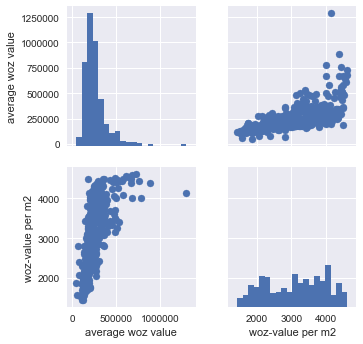

In [3]:
sns.set()
g = sns.PairGrid(data_price[['average woz value', 'woz-value per m2']])
g = g.map_diag(plt.hist, bins=20)
g = g.map_offdiag(plt.scatter)

In [4]:
data_price[data_price['average woz value'] > 1000000]['area']

258    K49a Diepenbrockbuurt
Name: area, dtype: object

# Family composition data

In [5]:
data_family = pd.read_excel('family_composition_2016_amsterdam.xlsx', sheet_name=0)
data_family.info()
data_family.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
area                      481 non-null object
single                    481 non-null object
married, no kids          481 non-null object
not married, no kids      481 non-null object
married, with kids        481 non-null object
not married, with kids    481 non-null object
single parent             481 non-null object
other                     481 non-null object
total                     481 non-null object
dtypes: object(9)
memory usage: 16.9+ KB


,area,single,"married, no kids","not married, no kids","married, with kids","not married, with kids",single parent,other,total
count,481,481,481,481,481,481,481,481,481
unique,481,359,203,222,222,133,198,57,399
top,M58f Overamstel,-,-,-,-,-,-,-,-
freq,1,24,44,45,53,61,62,84,18


In [6]:
data_family = data_family.replace(to_replace='-', value=0)
columns_to_divide = ['single', 'married, no kids', 'not married, no kids', 'married, with kids', 'not married, with kids', 'single parent', 'other']
data_family[columns_to_divide] = data_family[columns_to_divide].div(data_family['total'], axis=0)
data_family.info()
data_family.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
area                      481 non-null object
single                    463 non-null float64
married, no kids          463 non-null float64
not married, no kids      463 non-null float64
married, with kids        463 non-null float64
not married, with kids    463 non-null float64
single parent             463 non-null float64
other                     463 non-null float64
total                     481 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 32.0+ KB


,area,single,"married, no kids","not married, no kids","married, with kids","not married, with kids",single parent,other,total
count,481,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,481.000000
unique,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M58f Overamstel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.530319,0.101891,0.115485,0.111679,0.050162,0.074860,0.015605,935.650728
std,NaN,0.171182,0.073933,0.089556,0.084921,0.041240,0.052144,0.031344,781.214132
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.425142,0.058089,0.069922,0.052632,0.027465,0.042211,0.006569,207.000000
50%,NaN,0.540323,0.084559,0.108696,0.085761,0.042747,0.066735,0.011818,838.000000
75%,NaN,0.620528,0.129351,0.143233,0.165865,0.061256,0.099856,0.017181,1488.000000


In [7]:
data_family = data_family.fillna(value=0)
data_family.info()
data_family.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
area                      481 non-null object
single                    481 non-null float64
married, no kids          481 non-null float64
not married, no kids      481 non-null float64
married, with kids        481 non-null float64
not married, with kids    481 non-null float64
single parent             481 non-null float64
other                     481 non-null float64
total                     481 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 32.0+ KB


,area,single,"married, no kids","not married, no kids","married, with kids","not married, with kids",single parent,other,total
count,481,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
unique,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M58f Overamstel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.510473,0.098078,0.111163,0.107499,0.048285,0.072058,0.015021,935.650728
std,NaN,0.195848,0.075073,0.090559,0.085973,0.041566,0.053097,0.030893,781.214132
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.408730,0.055556,0.067268,0.048680,0.025070,0.038970,0.005495,207.000000
50%,NaN,0.533333,0.083125,0.106160,0.082367,0.041723,0.066180,0.011425,838.000000
75%,NaN,0.614781,0.126385,0.142857,0.160920,0.060533,0.098416,0.017060,1488.000000


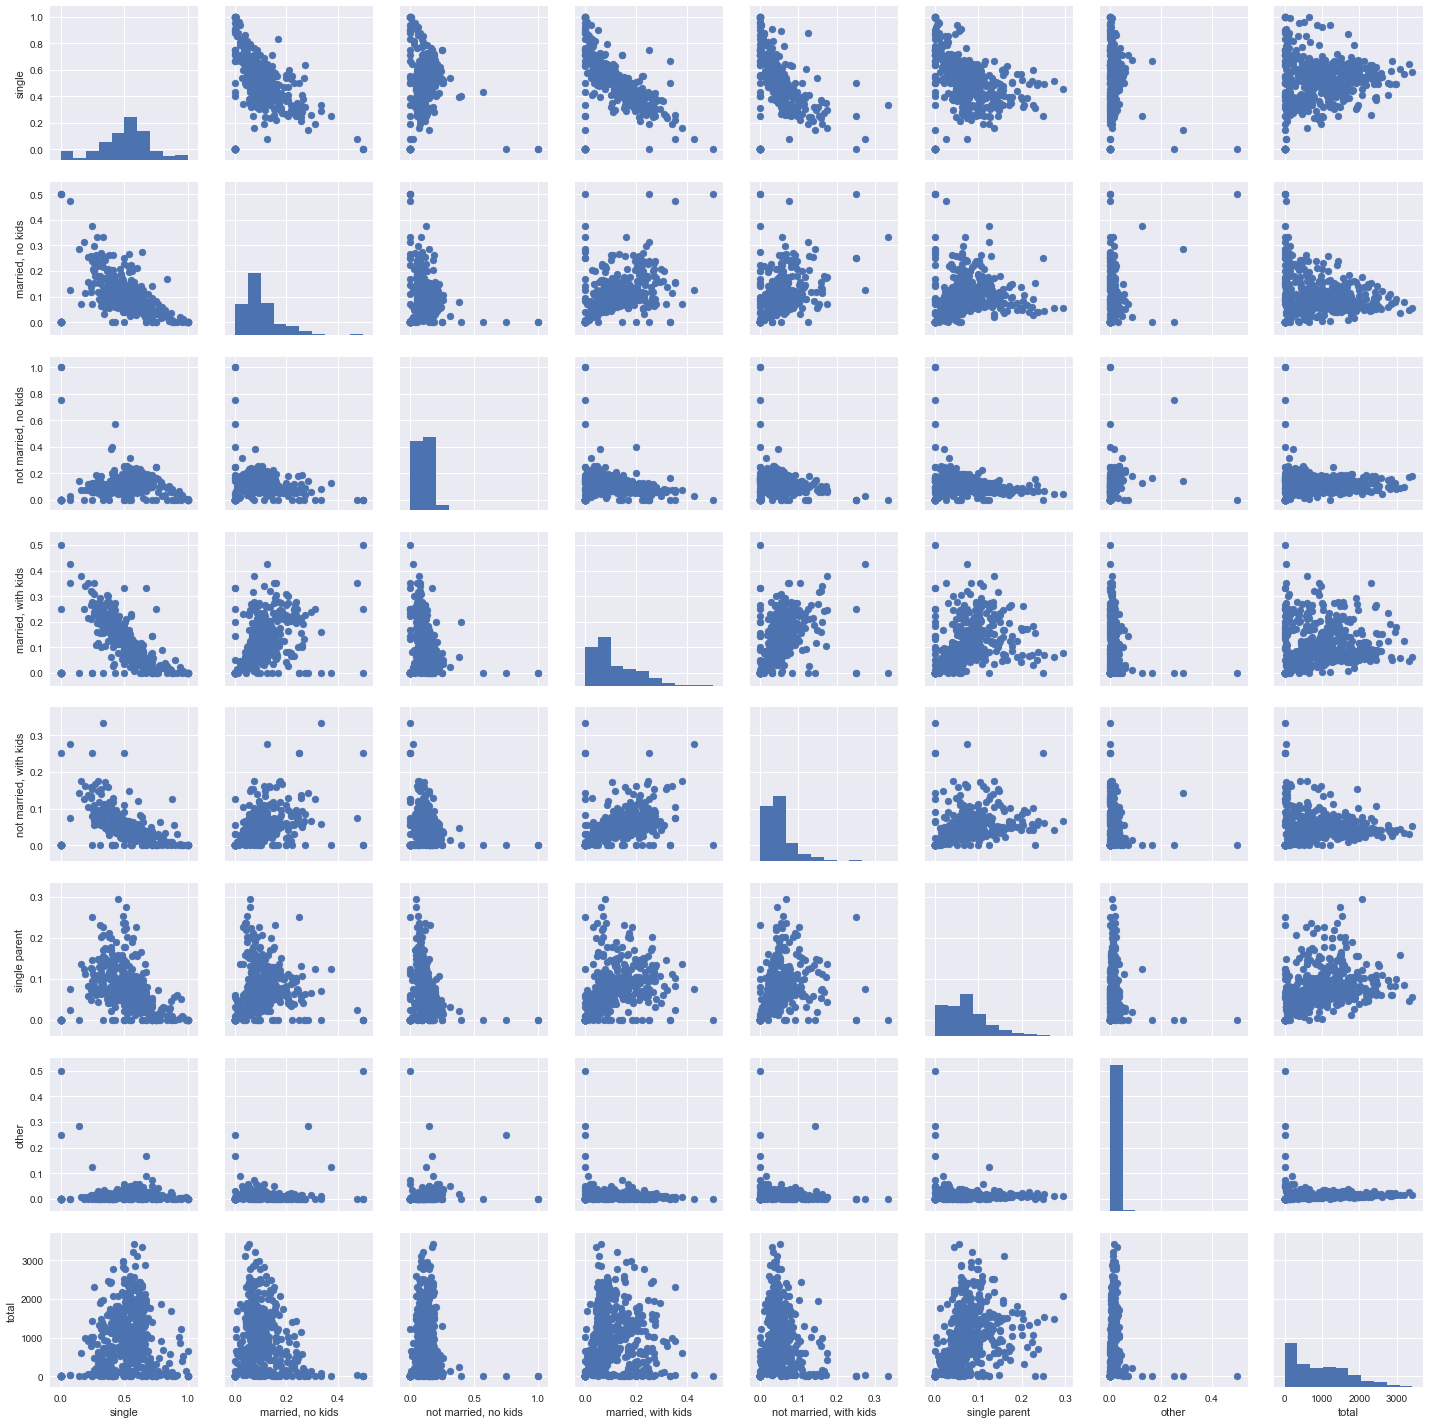

In [8]:
g = sns.PairGrid(data_family[columns_to_divide + ['total']])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

# Merge data

In [9]:
data_price = data_price.set_index(['area'])
data_family = data_family.set_index(['area'])
data = pd.merge(data_family, data_price, left_index=True, right_index=True)
data = data.drop(columns=['total'])
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, A00a Kop Zeedijk to T98a Dorp Driemond
Data columns (total 9 columns):
single                    382 non-null float64
married, no kids          382 non-null float64
not married, no kids      382 non-null float64
married, with kids        382 non-null float64
not married, with kids    382 non-null float64
single parent             382 non-null float64
other                     382 non-null float64
average woz value         382 non-null int64
woz-value per m2          382 non-null int64
dtypes: float64(7), int64(2)
memory usage: 28.4+ KB


,single,"married, no kids","not married, no kids","married, with kids","not married, with kids",single parent,other,average woz value,woz-value per m2
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,3.820000e+02,382.000000
mean,0.521396,0.099659,0.115430,0.116354,0.049664,0.083645,0.013853,2.612006e+05,3125.301047
std,0.131992,0.055662,0.048504,0.076608,0.028660,0.047885,0.009096,1.337475e+05,862.397111
min,0.160202,0.000000,0.017462,0.000000,0.000000,0.001982,0.000000,4.628700e+04,1427.000000
25%,0.434032,0.062691,0.075733,0.060759,0.032461,0.052655,0.008598,1.771055e+05,2317.500000
50%,0.536992,0.084624,0.112078,0.087722,0.043284,0.072251,0.012325,2.300575e+05,3188.000000
75%,0.608293,0.123834,0.142902,0.166019,0.059604,0.102762,0.017217,2.965090e+05,3863.000000
max,0.950904,0.333333,0.384615,0.377740,0.175772,0.294089,0.086957,1.295077e+06,4620.000000


# Relationship value and composition separately

<Figure size 1440x720 with 0 Axes>

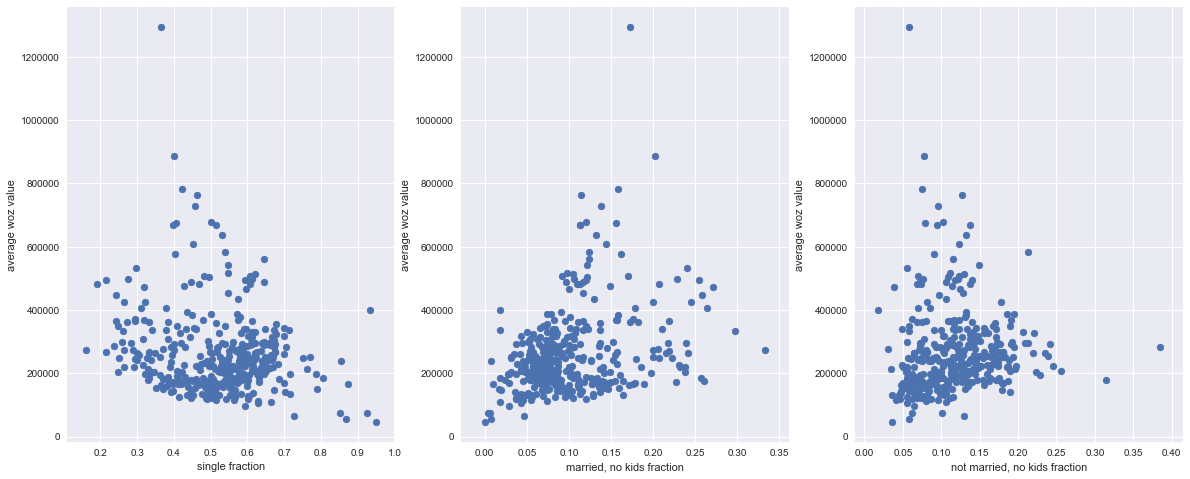

In [10]:
plt.figure(figsize=(20,10))
f, axarr = plt.subplots(1, 3, figsize=(20, 8))
axarr[0].scatter(data['single'], data['average woz value'])
axarr[0].set_xlabel('single fraction')
axarr[0].set_ylabel('average woz value')
axarr[1].scatter(data['married, no kids'], data['average woz value'])
axarr[1].set_xlabel('married, no kids fraction')
axarr[1].set_ylabel('average woz value')
axarr[2].scatter(data['not married, no kids'], data['average woz value'])
axarr[2].set_xlabel('not married, no kids fraction')
axarr[2].set_ylabel('average woz value')
plt.show()

<Figure size 1440x720 with 0 Axes>

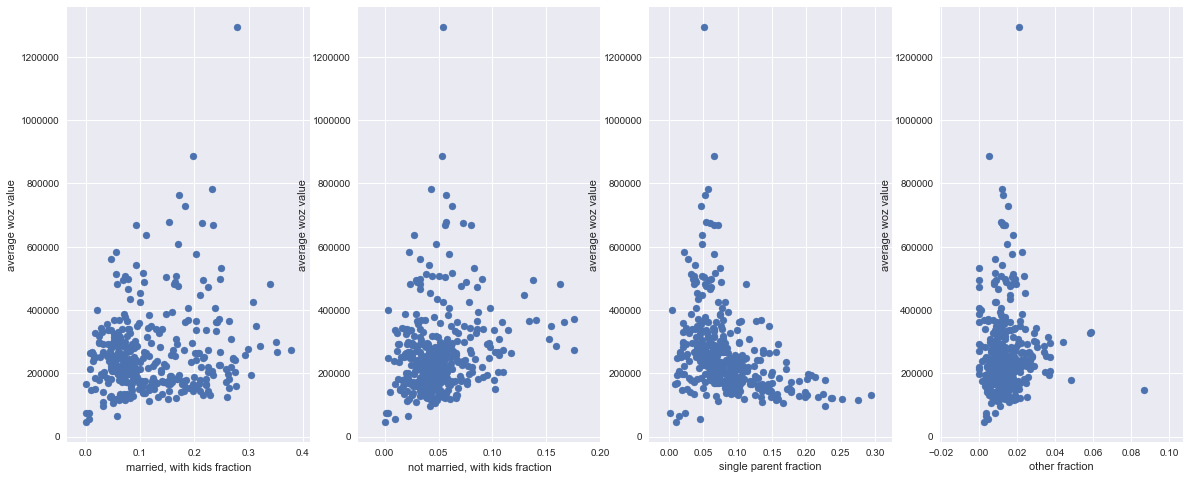

In [11]:
plt.figure(figsize=(20,10))
f, axarr = plt.subplots(1, 4, figsize=(20, 8))
axarr[0].scatter(data['married, with kids'], data['average woz value'])
axarr[0].set_xlabel('married, with kids fraction')
axarr[0].set_ylabel('average woz value')
axarr[1].scatter(data['not married, with kids'], data['average woz value'])
axarr[1].set_xlabel('not married, with kids fraction')
axarr[1].set_ylabel('average woz value')
axarr[2].scatter(data['single parent'], data['average woz value'])
axarr[2].set_xlabel('single parent fraction')
axarr[2].set_ylabel('average woz value')
axarr[3].scatter(data['other'], data['average woz value'])
axarr[3].set_xlabel('other fraction')
axarr[3].set_ylabel('average woz value')
plt.show()

In [12]:
for column in columns_to_divide:
    print(column, ' corr: ', np.corrcoef(data['average woz value'].values, data[column].values)[0, 1])


single  corr:  -0.19776710990082766
married, no kids  corr:  0.32881826463559
not married, no kids  corr:  0.07943000569064111
married, with kids  corr:  0.19478449562186995
not married, with kids  corr:  0.20709551645113064
single parent  corr:  -0.35778557258512894
other  corr:  0.02461058603410505


# Model

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

data = data.drop(columns=['other'])
data['n_m2'] = data['average woz value'].div(data['woz-value per m2'], axis=0)
data = data.drop(columns=['woz-value per m2'])

# computes cross entropy of the predicted gaussian and the point distribution of the true value, averaged over all observations  
def cross_entropy_gaus(y_true, mu, sigma):
    return np.log(np.sqrt(np.pi * sigma)) + mean_squared_error(y_true, mu) / sigma

# transform to numpy arrays as input to sklearn (keep index for later)
index = data.index
X = data.drop('average woz value', axis=1).values
y = data['average woz value'].values

# init
n_splits = 10
cross_entropy = np.zeros(n_splits)
cross_entropy_naive = np.zeros(n_splits)

# use three fold cross-valid, include naive benchmark (looks only at target variable)
k_fold = KFold(n_splits=n_splits)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]  

    mu_naive = y_train.mean() * np.ones(len(X_test))
    sigma_naive = y_train.var()
    
    reg = linear_model.BayesianRidge()
    reg.fit(X_train, y_train)
    mu = reg.predict(X_test)
    sigma = 1 / reg.alpha_

    cross_entropy[k] = cross_entropy_gaus(y_test, mu, sigma) 
    cross_entropy_naive[k] = cross_entropy_gaus(y_test, mu_naive, sigma_naive) 
    
print(cross_entropy.mean())
print(cross_entropy.std())
print(cross_entropy_naive.mean())
print(cross_entropy_naive.std())



13.418231834453053
2.2366058241948594
13.840388647271888
2.5669713611063485


# Predict

In [14]:
pred_areas = ['E41d', 'E15b', 'A09a']
for area_symbol in pred_areas:
    print(data_price.filter(axis='index', regex=area_symbol))

Empty DataFrame
Columns: [average woz value, woz-value per m2]
Index: []
Empty DataFrame
Columns: [average woz value, woz-value per m2]
Index: []
Empty DataFrame
Columns: [average woz value, woz-value per m2]
Index: []


In [15]:
reg = linear_model.BayesianRidge()
reg.fit(X, y)
X_pred = np.zeros((3, 7))
for k, area_symbol in enumerate(pred_areas):
    X_pred[k, 0:6] = data_family.filter(axis='index', regex=area_symbol).loc[:, ['single', 'married, no kids', 'not married, no kids', 'married, with kids', 'not married, with kids', 'single parent']].values
X_pred[:, 6] = data['n_m2'].mean()
pred = reg.predict(X_pred)

pred = pd.Series(pred, index=pred_areas)
print(pred)

E41d    324461.923597
E15b    239660.152631
A09a    303893.821629
dtype: float64


# Analyse factors

In [16]:
print('alpha: ', reg.alpha_)
print('lambda: ', reg.lambda_)
print('intercept: ', reg.intercept_)
print('coef: ')
print('')
print(pd.Series(reg.coef_, index = ['single', 'married, no kids', 'not married, no kids', 'married, with kids', 'not married, with kids', 'single parent'] + ['n_m2']))

alpha:  3.329182071059823e-10
lambda:  9.869552392519333e-12
intercept:  -335583.3839741561
coef: 

single                    311281.998732
married, no kids           68995.494768
not married, no kids      490611.470067
married, with kids         -4943.140320
not married, with kids    342687.889149
single parent            -359846.138615
n_m2                        4648.481353
dtype: float64
